# Advanced Data Mining for Data-Driven Insights and Predictive Modeling
## Deliverable 1: Data Collection, Cleaning, and Exploration

<table align="left" style="border: none;">
  <tr><td style="border: none;"><b>Course:</b></td><td style="border: none;">MSCS 634 — Advanced Big Data and Data Mining (Spring 2026)</td></tr>
  <tr><td style="border: none;"><b>Institution:</b></td><td style="border: none;">University of the Cumberlands</td></tr>
  <tr><td style="border: none;"><b>Date:</b></td><td style="border: none;">February 13, 2026</td></tr>
  <tr><td style="border: none;"><b>Team Members:</b></td><td style="border: none;">Mazen Abdul Rahman Mohammed · Aashish Shrestha · Mahesh Gaire</td></tr>
</table>

<br clear="all"/>

---

## 1. Dataset Selection and Description

### 1.1 Overview

| Property | Detail |
|:---------|:-------|
| **Dataset** | [Online Retail Dataset](https://archive.ics.uci.edu/ml/datasets/online+retail) |
| **Original Source** | UCI Machine Learning Repository (also available on [Kaggle](https://www.kaggle.com/datasets/vijayuv/onlineretail)) |
| **Domain** | E-Commerce — Retail Sales Transactions |
| **Records** | 541,909 |
| **Attributes** | 8 |
| **Time Span** | December 1, 2010 — December 9, 2011 |
| **Geography** | 38 countries (primarily United Kingdom) |

### 1.2 Attribute Dictionary

| # | Attribute | Type | Description |
|:-:|:----------|:-----|:------------|
| 1 | `InvoiceNo` | Nominal (str) | Unique 6-digit invoice number; prefix **'C'** indicates a cancellation |
| 2 | `StockCode` | Nominal (str) | Unique 5-digit product/item code |
| 3 | `Description` | Nominal (str) | Product name |
| 4 | `Quantity` | Numeric (int) | Quantity of each product per transaction |
| 5 | `InvoiceDate` | Date (str) | Invoice date and time (`MM/DD/YYYY HH:MM`) |
| 6 | `UnitPrice` | Numeric (float) | Unit price in GBP (£) |
| 7 | `CustomerID` | Nominal (float) | Unique 5-digit customer identifier |
| 8 | `Country` | Nominal (str) | Country of the customer |

### 1.3 Justification for Selection

This dataset was selected because it comprehensively satisfies the project criteria and supports all four deliverables:

**1. Size & Scale**
> With **541,909 records** and **8 attributes**, the dataset significantly exceeds the minimum requirement of 500+ records and 8–10 attributes, providing a robust foundation for meaningful data mining.

**2. Rich Data-Quality Challenges**
> The dataset presents real-world preprocessing challenges that are essential for demonstrating data cleaning competency:
> - **Missing Values:** ~25% of `CustomerID` entries are null, requiring a well-justified removal/imputation strategy.
> - **Noisy Data:** Negative values in `Quantity` (product returns) and `UnitPrice` (data entry errors) must be identified and handled.
> - **Duplicates & Inconsistencies:** Exact duplicate rows and cancelled transactions (prefix 'C') need to be detected and addressed.

**3. Suitability for Regression (Deliverable 2)**
> - The numerical attributes (`Quantity`, `UnitPrice`) enable predictive modeling of **Total Sales Revenue**.
> - The presence of outliers and potential multicollinearity makes the data an excellent candidate for **Ridge Regression (L2 Regularization)** to prevent overfitting.

**4. Suitability for Classification, Clustering & Association Mining (Deliverables 3 & 4)**
> - **Classification:** Customer purchasing behavior can be labeled (e.g., *High-Value* vs. *Low-Value* customers) to train classifiers such as **Decision Trees** and **Random Forests**.
> - **Clustering:** The data supports **RFM Analysis** (Recency, Frequency, Monetary) — the industry-standard framework for **K-Means customer segmentation**.
> - **Association Rule Mining:** The invoice–product transactional structure is inherently suited for **Market Basket Analysis** using the **Apriori algorithm** to discover frequent itemsets and co-purchase patterns.

---
## 2. Load Dataset and Inspect Structure
Import all required libraries and load the Online Retail dataset using Pandas. We then inspect the shape, data types, and first few records to understand the raw data before any cleaning.

In [1]:
# ============================================================
# 2.1 Import Required Libraries
# ============================================================
# Core data manipulation
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set global visualization style for consistency
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

print("✅ All libraries imported successfully.")

✅ All libraries imported successfully.


In [2]:
# ============================================================
# 2.2 Load the Dataset
# ============================================================
# Load the Online Retail dataset from CSV.
# encoding='ISO-8859-1' handles special characters in product descriptions.
df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1')

# Display basic dataset information
print(f"Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns\n")
print("=" * 60)
print("Column Names and Data Types:")
print("=" * 60)
print(df.dtypes)
print("\n" + "=" * 60)
print("First 5 Rows of the Dataset:")
print("=" * 60)
df.head()

Dataset Shape: 541,909 rows × 8 columns

Column Names and Data Types:
InvoiceNo          str
StockCode          str
Description        str
Quantity         int64
InvoiceDate        str
UnitPrice      float64
CustomerID     float64
Country            str
dtype: object

First 5 Rows of the Dataset:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# ============================================================
# 2.3 Detailed Dataset Inspection
# ============================================================
# Use .info() to see non-null counts and memory usage.
# This helps identify columns with missing values.
print("Detailed Dataset Info:")
print("=" * 60)
df.info()

print("\n" + "=" * 60)
print("Statistical Summary of Numerical Columns:")
print("=" * 60)
df.describe()

Detailed Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB

Statistical Summary of Numerical Columns:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Missing Values Summary:
             Missing Count  Percentage (%)
CustomerID          135080           24.93
Description           1454            0.27


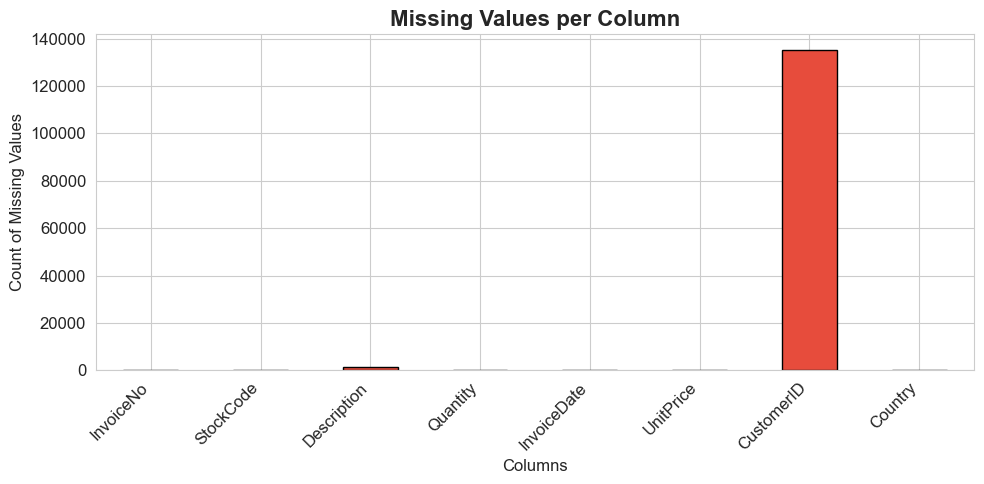


📌 Key Finding: 'CustomerID' has 135,080 missing values (24.9%), and 'Description' has 1,454 (0.3%).


In [4]:
# ============================================================
# 2.4 Missing Values Analysis
# ============================================================
# Quantify missing values in each column to determine cleaning strategy.
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage (%)': missing_pct.round(2)
}).sort_values('Missing Count', ascending=False)

print("Missing Values Summary:")
print("=" * 60)
print(missing_df[missing_df['Missing Count'] > 0])

# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#e74c3c' if v > 0 else '#2ecc71' for v in missing.values]
missing.plot(kind='bar', ax=ax, color=colors, edgecolor='black')
ax.set_title('Missing Values per Column', fontsize=16, fontweight='bold')
ax.set_ylabel('Count of Missing Values')
ax.set_xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\n📌 Key Finding: 'CustomerID' has {missing['CustomerID']:,} missing values "
      f"({missing_pct['CustomerID']:.1f}%), and 'Description' has {missing['Description']:,} "
      f"({missing_pct['Description']:.1f}%).")

---
## 3. Data Cleaning

In this section, we systematically address the following data quality issues:

1. **Missing Values** — Remove rows with missing `CustomerID` (required for customer-level analysis) and missing `Description`.
2. **Duplicate Records** — Identify and remove exact duplicate rows.
3. **Cancelled/Returned Transactions** — Filter out invoices starting with 'C' (cancellations) that represent reversed transactions, not actual sales.
4. **Noisy Data (Negative & Zero Values)** — Remove rows where `Quantity ≤ 0` or `UnitPrice ≤ 0`, as they represent errors or non-standard entries.
5. **Data Type Corrections** — Convert `InvoiceDate` to datetime format and `CustomerID` to integer for consistency.
6. **Feature Engineering** — Create a `TotalPrice` column (`Quantity × UnitPrice`) to support revenue analysis.

In [5]:
# ============================================================
# 3.1 Handle Missing Values
# ============================================================
# Record original shape for reporting
original_rows = len(df)

# --- Step 1: Remove rows with missing CustomerID ---
# Justification: CustomerID is essential for customer segmentation,
# clustering (RFM), and classification tasks in future deliverables.
# ~25% of records lack CustomerID; imputation is not feasible for IDs.
df_clean = df.dropna(subset=['CustomerID'])
after_cust_drop = len(df_clean)
print(f"Step 1 — Removed rows with missing CustomerID:")
print(f"   Rows removed: {original_rows - after_cust_drop:,}")
print(f"   Remaining rows: {after_cust_drop:,}\n")

# --- Step 2: Remove rows with missing Description ---
# Justification: Description is needed for association rule mining
# (Market Basket Analysis) in Deliverable 4.
before = len(df_clean)
df_clean = df_clean.dropna(subset=['Description'])
print(f"Step 2 — Removed rows with missing Description:")
print(f"   Rows removed: {before - len(df_clean):,}")
print(f"   Remaining rows: {len(df_clean):,}\n")

# Verify no missing values remain
print("Remaining missing values per column:")
print(df_clean.isnull().sum())
print(f"\n✅ All missing values have been resolved.")

Step 1 — Removed rows with missing CustomerID:
   Rows removed: 135,080
   Remaining rows: 406,829

Step 2 — Removed rows with missing Description:
   Rows removed: 0
   Remaining rows: 406,829

Remaining missing values per column:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

✅ All missing values have been resolved.


In [6]:
# ============================================================
# 3.2 Remove Duplicate Records
# ============================================================
# Exact duplicate rows may exist due to data entry errors or system glitches.
duplicates_count = df_clean.duplicated().sum()
print(f"Step 3 — Duplicate rows found: {duplicates_count:,}")

df_clean = df_clean.drop_duplicates()
print(f"   Rows after removing duplicates: {len(df_clean):,}")
print(f"   ✅ {duplicates_count:,} duplicate rows removed.")

Step 3 — Duplicate rows found: 5,225
   Rows after removing duplicates: 401,604
   ✅ 5,225 duplicate rows removed.


In [7]:
# ============================================================
# 3.3 Remove Cancelled Transactions (Noisy Data)
# ============================================================
# Invoices starting with 'C' represent cancellations/returns.
# These are reversed transactions and should be excluded from sales analysis.
cancelled_mask = df_clean['InvoiceNo'].astype(str).str.startswith('C')
cancelled_count = cancelled_mask.sum()
print(f"Step 4 — Cancelled transactions (InvoiceNo starts with 'C'): {cancelled_count:,}")

df_clean = df_clean[~cancelled_mask]
print(f"   Rows after removing cancellations: {len(df_clean):,}")
print(f"   ✅ {cancelled_count:,} cancelled transaction rows removed.")

Step 4 — Cancelled transactions (InvoiceNo starts with 'C'): 8,872
   Rows after removing cancellations: 392,732
   ✅ 8,872 cancelled transaction rows removed.


In [8]:
# ============================================================
# 3.4 Remove Rows with Non-Positive Quantity or UnitPrice
# ============================================================
# Negative or zero Quantity/UnitPrice values are noisy data points
# that do not represent valid sales transactions.
before = len(df_clean)
neg_qty = (df_clean['Quantity'] <= 0).sum()
neg_price = (df_clean['UnitPrice'] <= 0).sum()
print(f"Step 5 — Rows with Quantity ≤ 0: {neg_qty:,}")
print(f"         Rows with UnitPrice ≤ 0: {neg_price:,}")

df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"   Rows after filtering: {len(df_clean):,}")
print(f"   ✅ {before - len(df_clean):,} rows with non-positive values removed.")

Step 5 — Rows with Quantity ≤ 0: 0
         Rows with UnitPrice ≤ 0: 40
   Rows after filtering: 392,692
   ✅ 40 rows with non-positive values removed.


In [9]:
# ============================================================
# 3.5 Data Type Corrections
# ============================================================
# Convert InvoiceDate from string to datetime for time-series analysis.
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Convert CustomerID from float to integer (was float due to NaN values).
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

print("Step 6 — Data type corrections applied:")
print(df_clean.dtypes)
print(f"\n✅ InvoiceDate → datetime64, CustomerID → int64")

Step 6 — Data type corrections applied:
InvoiceNo                 str
StockCode                 str
Description               str
Quantity                int64
InvoiceDate    datetime64[us]
UnitPrice             float64
CustomerID              int64
Country                   str
dtype: object

✅ InvoiceDate → datetime64, CustomerID → int64


In [10]:
# ============================================================
# 3.6 Feature Engineering — Create TotalPrice Column
# ============================================================
# TotalPrice = Quantity × UnitPrice
# This derived feature represents the revenue per line item and is
# essential for regression modeling and revenue analysis.
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice']

print("Step 7 — Created 'TotalPrice' column (Quantity × UnitPrice)")
print(f"\nUpdated dataset shape: {df_clean.shape[0]:,} rows × {df_clean.shape[1]} columns")
print(f"\nCleaning Summary:")
print(f"{'='*60}")
print(f"  Original rows:    {original_rows:,}")
print(f"  Cleaned rows:     {len(df_clean):,}")
print(f"  Total rows removed: {original_rows - len(df_clean):,} "
      f"({((original_rows - len(df_clean))/original_rows)*100:.1f}%)")
print(f"{'='*60}")
print(f"\n✅ Data cleaning complete. Dataset is ready for EDA.")
df_clean.head(10)

Step 7 — Created 'TotalPrice' column (Quantity × UnitPrice)

Updated dataset shape: 392,692 rows × 9 columns

Cleaning Summary:
  Original rows:    541,909
  Cleaned rows:     392,692
  Total rows removed: 149,217 (27.5%)

✅ Data cleaning complete. Dataset is ready for EDA.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


---
## 4. Exploratory Data Analysis (EDA)

In this section, we use visualizations (Seaborn and Matplotlib) to explore:

- **Data distributions** of key numerical features
- **Outlier detection** using box plots and the IQR method
- **Temporal trends** in sales over time
- **Geographic analysis** of revenue by country
- **Top products** by sales volume and revenue
- **Feature relationships** through correlation analysis and scatter plots

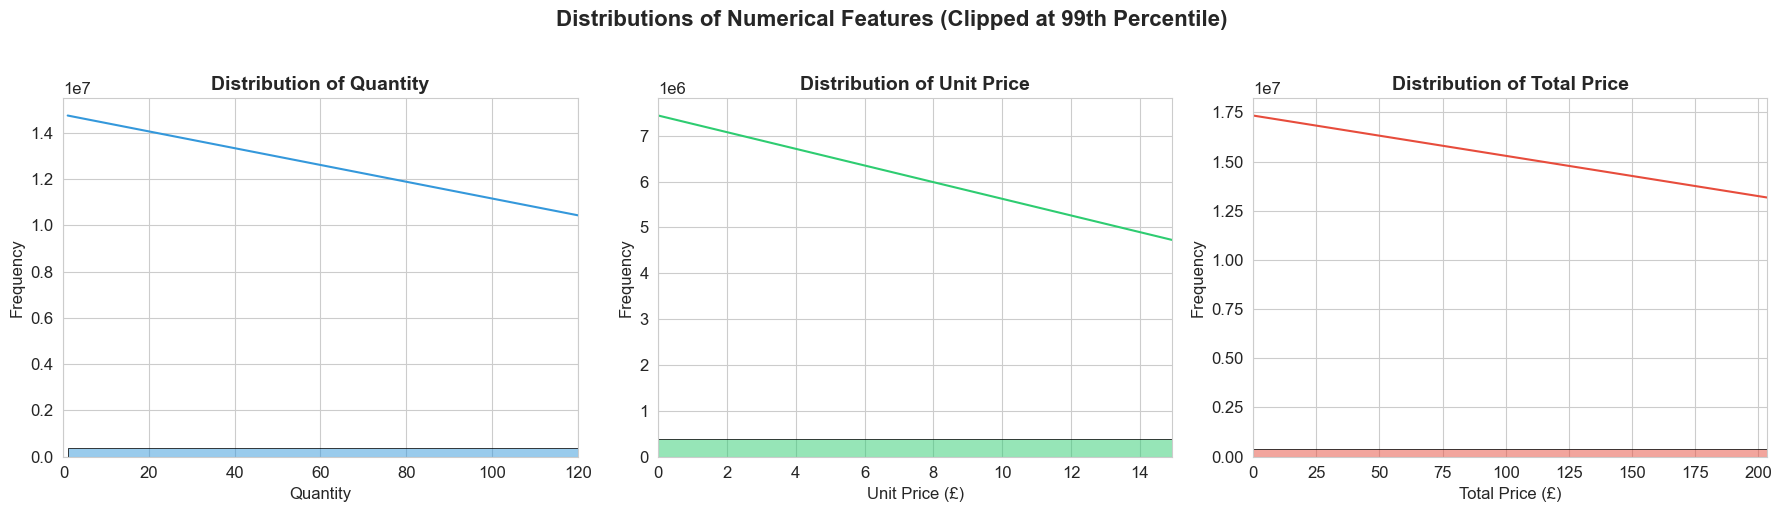

Skewness Values:
  Quantity: 407.35
  UnitPrice: 202.74
  TotalPrice: 448.52

📌 All three features are heavily right-skewed, indicating the presence of outliers and the potential need for log-transformation in future regression modeling.


In [11]:
# ============================================================
# 4.1 Distribution of Numerical Features
# ============================================================
# Understanding the distribution of Quantity, UnitPrice, and TotalPrice
# helps identify skewness and the need for transformations in modeling.

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Quantity Distribution
sns.histplot(df_clean['Quantity'], bins=50, kde=True, color='#3498db', ax=axes[0], edgecolor='black')
axes[0].set_title('Distribution of Quantity', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(0, df_clean['Quantity'].quantile(0.99))  # Clip at 99th percentile for readability

# UnitPrice Distribution
sns.histplot(df_clean['UnitPrice'], bins=50, kde=True, color='#2ecc71', ax=axes[1], edgecolor='black')
axes[1].set_title('Distribution of Unit Price', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Unit Price (£)')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(0, df_clean['UnitPrice'].quantile(0.99))

# TotalPrice Distribution
sns.histplot(df_clean['TotalPrice'], bins=50, kde=True, color='#e74c3c', ax=axes[2], edgecolor='black')
axes[2].set_title('Distribution of Total Price', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Total Price (£)')
axes[2].set_ylabel('Frequency')
axes[2].set_xlim(0, df_clean['TotalPrice'].quantile(0.99))

plt.suptitle('Distributions of Numerical Features (Clipped at 99th Percentile)',
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print skewness values
print("Skewness Values:")
for col in ['Quantity', 'UnitPrice', 'TotalPrice']:
    print(f"  {col}: {df_clean[col].skew():.2f}")
print("\n📌 All three features are heavily right-skewed, indicating the presence of outliers "
      "and the potential need for log-transformation in future regression modeling.")

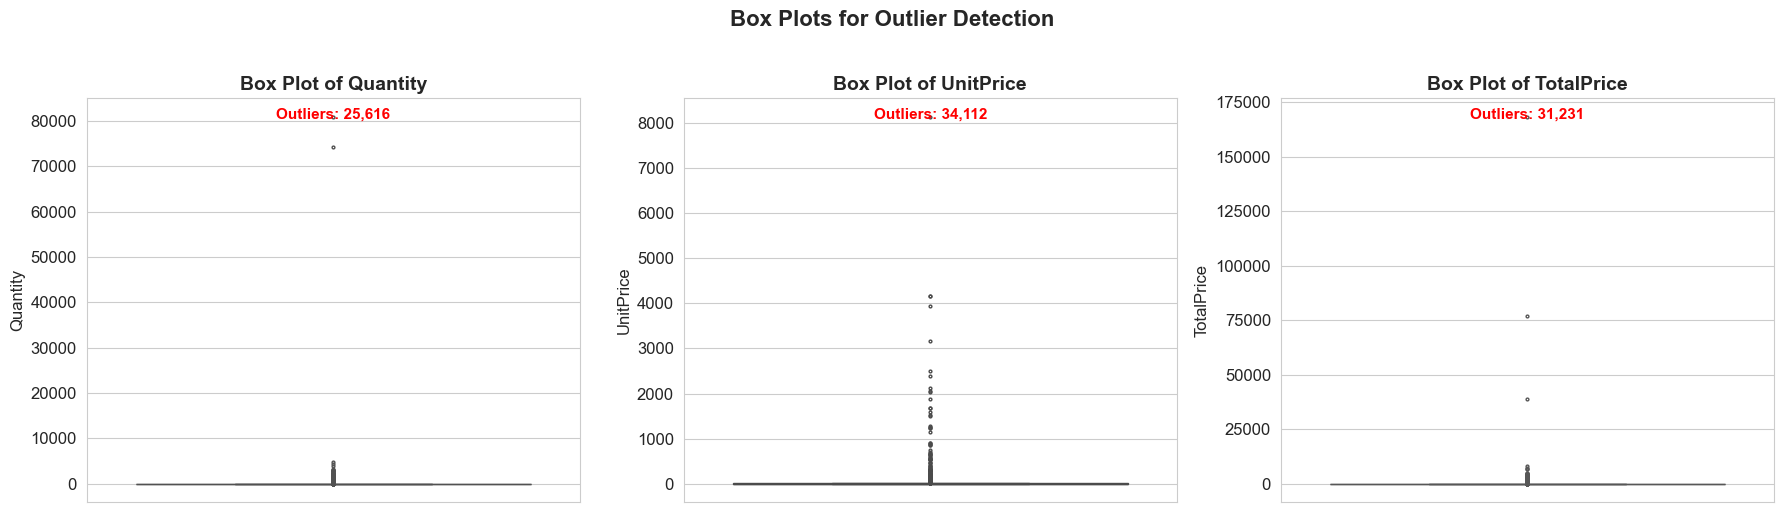

📌 Significant outliers exist in all three numerical features.
   These extreme values likely represent bulk/wholesale orders.
   For regression modeling, we may apply log-transformation or capping to reduce their influence.


In [12]:
# ============================================================
# 4.2 Outlier Detection Using Box Plots
# ============================================================
# Box plots visualize the spread and identify outliers (points beyond
# 1.5 × IQR from Q1/Q3). This is critical for deciding whether to
# cap, transform, or remove outliers before modeling.

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, col, color in zip(axes,
                           ['Quantity', 'UnitPrice', 'TotalPrice'],
                           ['#3498db', '#2ecc71', '#e74c3c']):
    sns.boxplot(y=df_clean[col], ax=ax, color=color, fliersize=2)
    ax.set_title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    ax.set_ylabel(col)

    # Calculate IQR-based outlier counts
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_clean[col] < lower) | (df_clean[col] > upper)).sum()
    ax.text(0.5, 0.95, f'Outliers: {outliers:,}', transform=ax.transAxes,
            ha='center', fontsize=11, color='red', fontweight='bold')

plt.suptitle('Box Plots for Outlier Detection', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("📌 Significant outliers exist in all three numerical features.")
print("   These extreme values likely represent bulk/wholesale orders.")
print("   For regression modeling, we may apply log-transformation or capping "
      "to reduce their influence.")

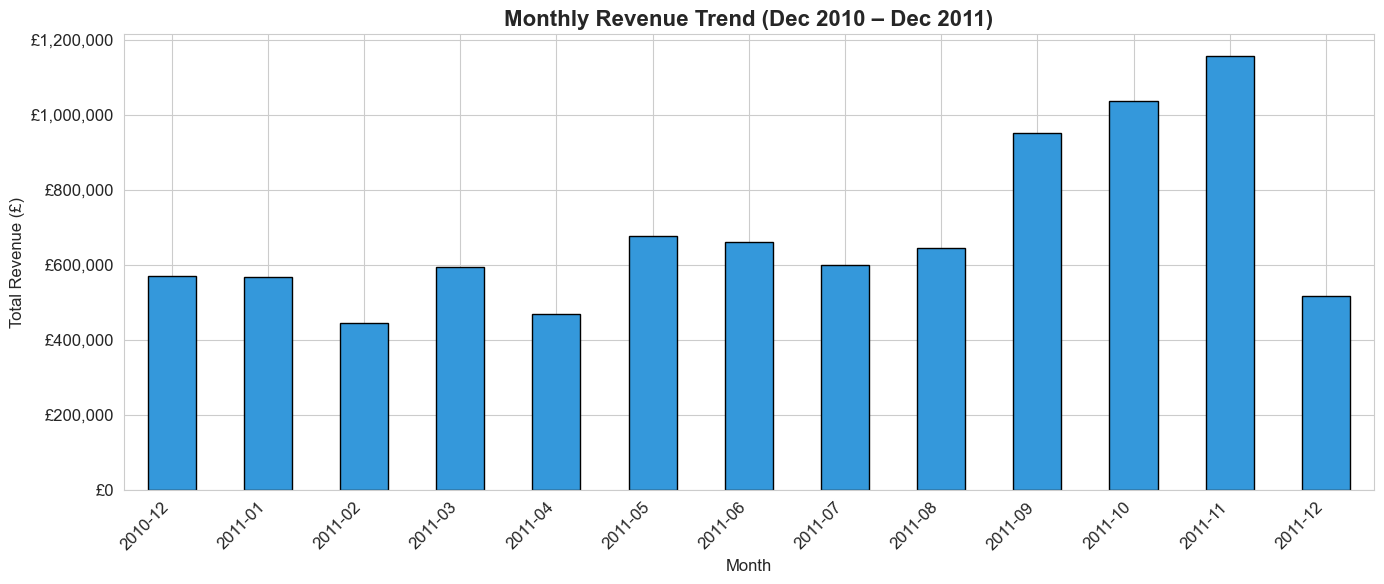

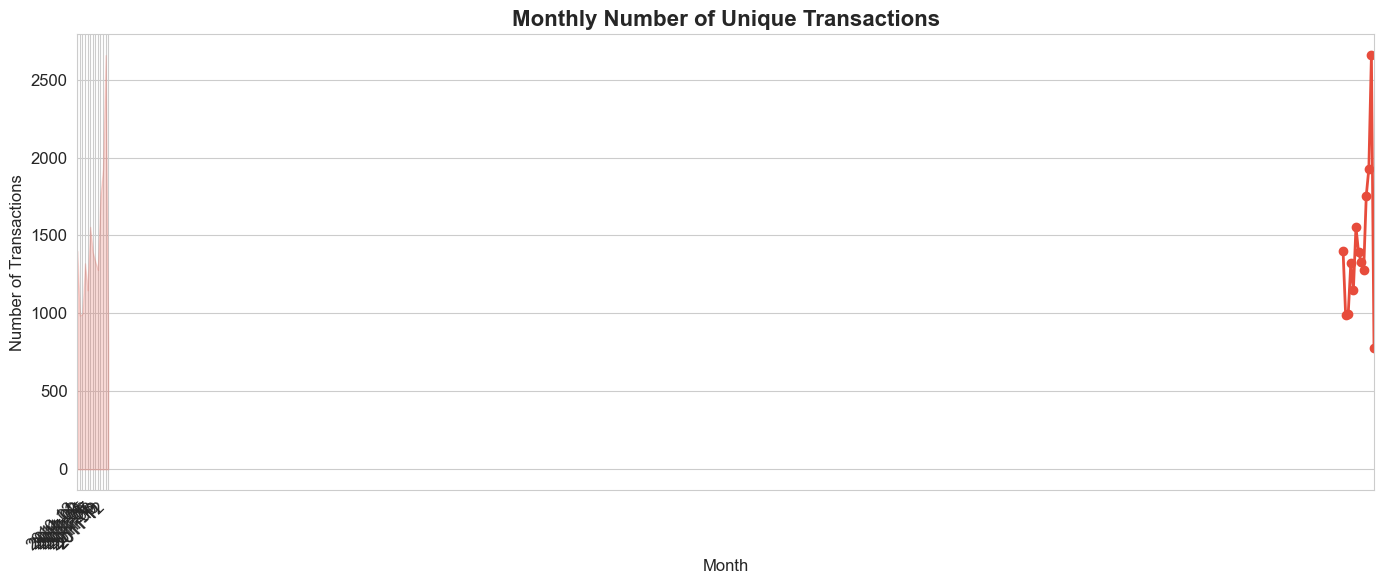

📌 Revenue and transaction volume show a clear upward trend from summer to autumn,
   peaking around November 2011 — likely driven by holiday season shopping.
   December 2011 shows a decline, but the data only covers the first few days of that month.


In [13]:
# ============================================================
# 4.3 Monthly Sales Trend Analysis
# ============================================================
# Analyze revenue over time to identify seasonal patterns and trends.
# This temporal analysis will inform time-based features for modeling.

# Create a Year-Month column for aggregation
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')

monthly_revenue = df_clean.groupby('YearMonth')['TotalPrice'].sum()

fig, ax = plt.subplots(figsize=(14, 6))
monthly_revenue.plot(kind='bar', color='#3498db', edgecolor='black', ax=ax)
ax.set_title('Monthly Revenue Trend (Dec 2010 – Dec 2011)', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Revenue (£)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.0f}'))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Also plot monthly transaction count
monthly_transactions = df_clean.groupby('YearMonth')['InvoiceNo'].nunique()

fig, ax = plt.subplots(figsize=(14, 6))
monthly_transactions.plot(kind='line', marker='o', color='#e74c3c', linewidth=2, ax=ax)
ax.set_title('Monthly Number of Unique Transactions', fontsize=16, fontweight='bold')
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Number of Transactions', fontsize=12)
ax.fill_between(range(len(monthly_transactions)), monthly_transactions.values, alpha=0.2, color='#e74c3c')
plt.xticks(range(len(monthly_transactions)), [str(p) for p in monthly_transactions.index], rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("📌 Revenue and transaction volume show a clear upward trend from summer to autumn,")
print("   peaking around November 2011 — likely driven by holiday season shopping.")
print("   December 2011 shows a decline, but the data only covers the first few days of that month.")

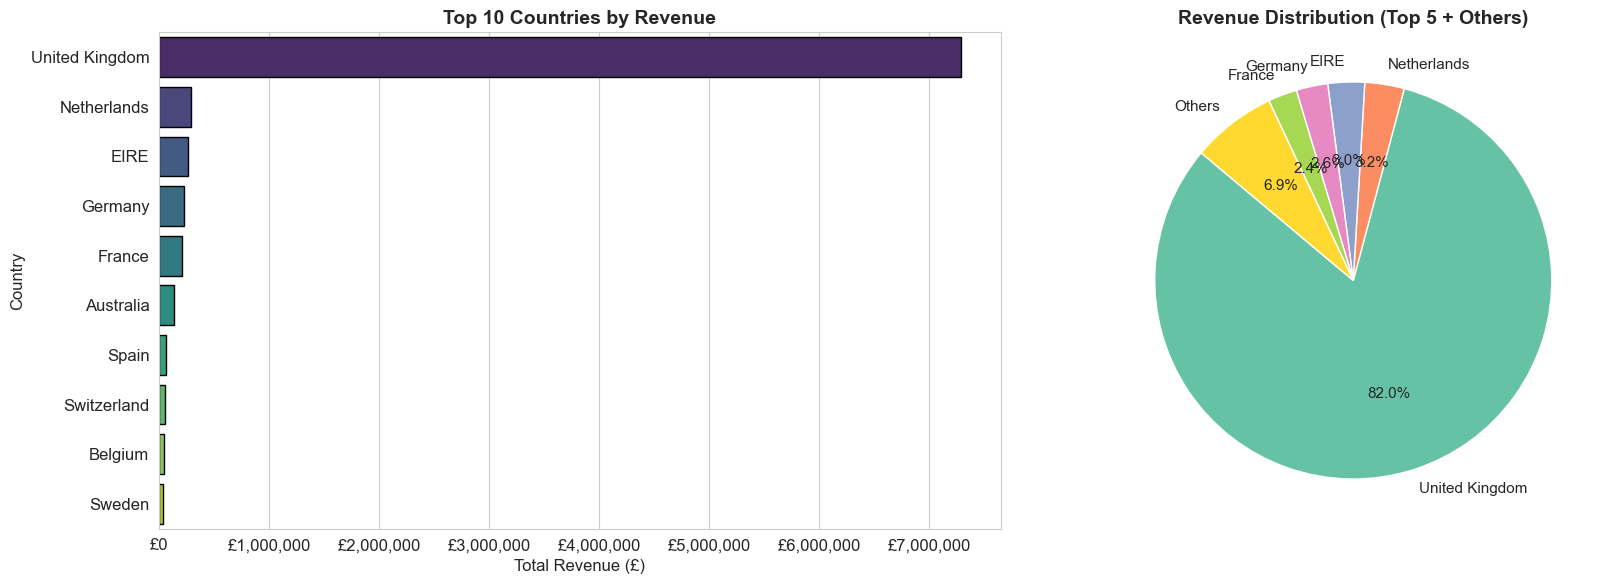

📌 The United Kingdom dominates with 82.0% of total revenue.
   Total countries represented: 37
   Top 5 countries account for 93.1% of all revenue.


In [14]:
# ============================================================
# 4.4 Revenue by Country — Geographic Analysis
# ============================================================
# Understand which countries generate the most revenue.
# This will help identify potential geographic features for classification.

country_revenue = df_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

# --- Top 10 Countries by Revenue ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Bar chart — Top 10 countries
top10 = country_revenue.head(10)
sns.barplot(x=top10.values, y=top10.index, palette='viridis', ax=axes[0], edgecolor='black')
axes[0].set_title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Revenue (£)')
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.0f}'))

# Pie chart — Revenue share (Top 5 + Others)
top5 = country_revenue.head(5)
others = pd.Series({'Others': country_revenue.iloc[5:].sum()})
pie_data = pd.concat([top5, others])
axes[1].pie(pie_data, labels=pie_data.index, autopct='%1.1f%%',
            startangle=140, colors=sns.color_palette('Set2', len(pie_data)),
            textprops={'fontsize': 11})
axes[1].set_title('Revenue Distribution (Top 5 + Others)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print(f"📌 The United Kingdom dominates with {(country_revenue.iloc[0]/country_revenue.sum())*100:.1f}% of total revenue.")
print(f"   Total countries represented: {len(country_revenue)}")
print(f"   Top 5 countries account for {(top5.sum()/country_revenue.sum())*100:.1f}% of all revenue.")

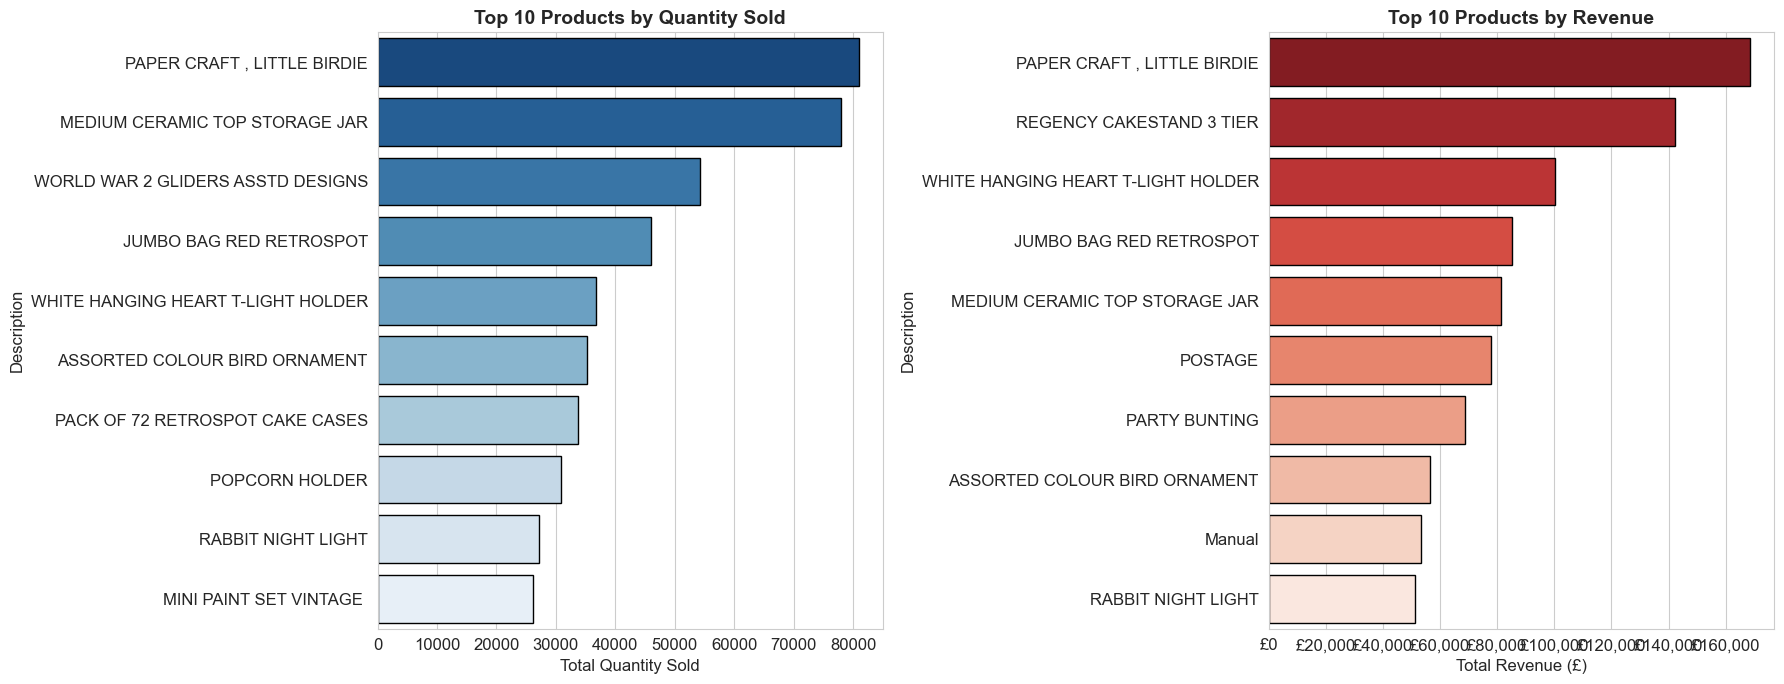

📌 The best-selling product by quantity differs from the top revenue generator,
   indicating that high-volume items are not necessarily the most profitable.
   This distinction will be useful for classification (high-value vs. low-value products).


In [15]:
# ============================================================
# 4.5 Top 10 Best-Selling Products
# ============================================================
# Identify the most popular products by quantity sold and by revenue.
# This informs association rule mining (which products to focus on).

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top 10 by Quantity
top_qty = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_qty.values, y=top_qty.index, palette='Blues_r', ax=axes[0], edgecolor='black')
axes[0].set_title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Quantity Sold')

# Top 10 by Revenue
top_rev = df_clean.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_rev.values, y=top_rev.index, palette='Reds_r', ax=axes[1], edgecolor='black')
axes[1].set_title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Revenue (£)')
axes[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.0f}'))

plt.tight_layout()
plt.show()

print("📌 The best-selling product by quantity differs from the top revenue generator,")
print("   indicating that high-volume items are not necessarily the most profitable.")
print("   This distinction will be useful for classification (high-value vs. low-value products).")

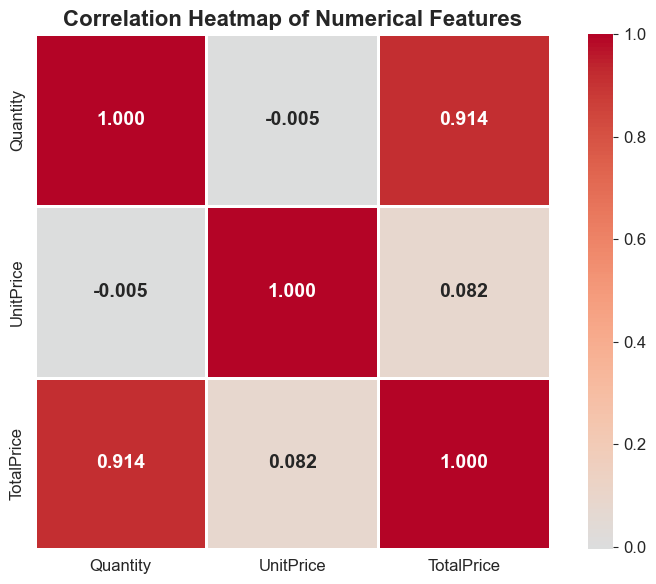

📌 Key Correlation Insights:
   • Quantity vs TotalPrice: r = 0.914 (moderate positive)
   • UnitPrice vs TotalPrice: r = 0.082 (positive)
   • Quantity vs UnitPrice: r = -0.005 (weak/near-zero)

   Since TotalPrice = Quantity × UnitPrice, using all three as predictors would
   introduce multicollinearity. In future regression models, we should carefully
   select features or use Ridge Regression (L2 regularization) to handle this.


In [16]:
# ============================================================
# 4.6 Correlation Analysis — Feature Relationships
# ============================================================
# Examine correlations between numerical features to understand
# multicollinearity and guide feature selection for regression.

numerical_cols = ['Quantity', 'UnitPrice', 'TotalPrice']
corr_matrix = df_clean[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', linewidths=1, square=True, ax=ax,
            annot_kws={'size': 14, 'fontweight': 'bold'})
ax.set_title('Correlation Heatmap of Numerical Features',
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("📌 Key Correlation Insights:")
print(f"   • Quantity vs TotalPrice: r = {corr_matrix.loc['Quantity','TotalPrice']:.3f} (moderate positive)")
print(f"   • UnitPrice vs TotalPrice: r = {corr_matrix.loc['UnitPrice','TotalPrice']:.3f} (positive)")
print(f"   • Quantity vs UnitPrice: r = {corr_matrix.loc['Quantity','UnitPrice']:.3f} (weak/near-zero)")
print("\n   Since TotalPrice = Quantity × UnitPrice, using all three as predictors would")
print("   introduce multicollinearity. In future regression models, we should carefully")
print("   select features or use Ridge Regression (L2 regularization) to handle this.")

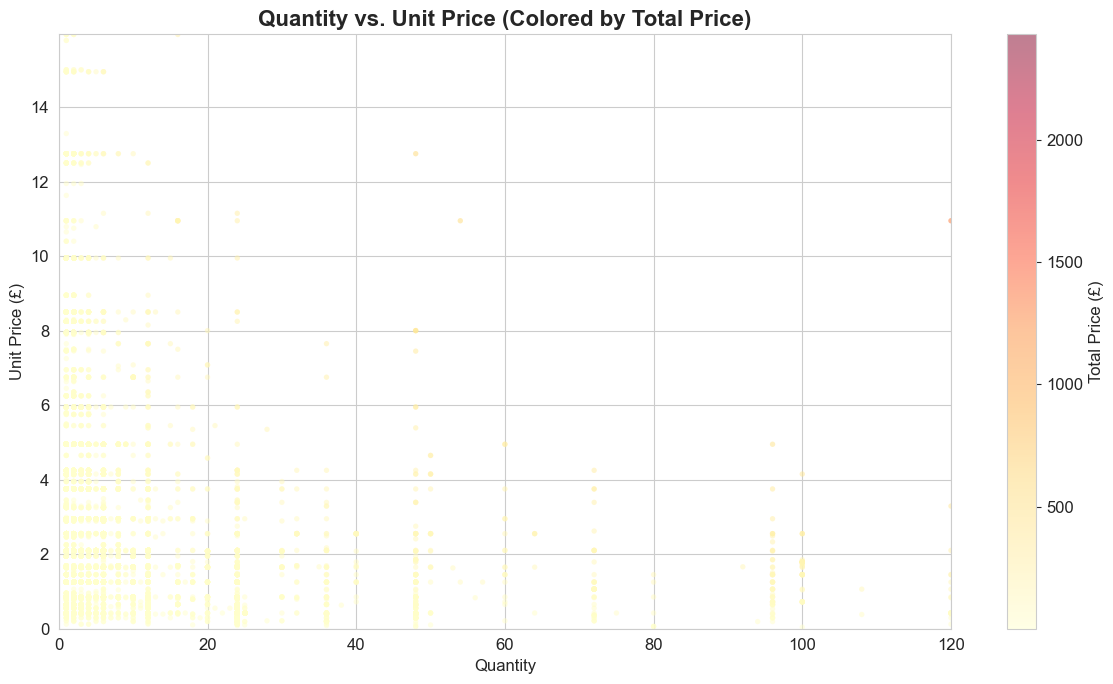

📌 Most transactions cluster in the low-quantity, low-price region.
   High TotalPrice values (dark red) appear at either high quantity or high unit price,
   but rarely both — suggesting two distinct purchasing behaviors: bulk orders vs. premium items.


In [17]:
# ============================================================
# 4.7 Scatter Plot — Quantity vs. UnitPrice (with TotalPrice hue)
# ============================================================
# Explore the relationship between order size and price point.
# Color-coding by TotalPrice reveals spending patterns.

# Sample 10,000 points for visualization clarity
sample = df_clean.sample(n=10000, random_state=42)

fig, ax = plt.subplots(figsize=(12, 7))
scatter = ax.scatter(sample['Quantity'], sample['UnitPrice'],
                     c=sample['TotalPrice'], cmap='YlOrRd',
                     alpha=0.5, s=15, edgecolors='none')
cbar = plt.colorbar(scatter, ax=ax, label='Total Price (£)')
ax.set_title('Quantity vs. Unit Price (Colored by Total Price)',
             fontsize=16, fontweight='bold')
ax.set_xlabel('Quantity', fontsize=12)
ax.set_ylabel('Unit Price (£)', fontsize=12)
ax.set_xlim(0, sample['Quantity'].quantile(0.99))
ax.set_ylim(0, sample['UnitPrice'].quantile(0.99))
plt.tight_layout()
plt.show()

print("📌 Most transactions cluster in the low-quantity, low-price region.")
print("   High TotalPrice values (dark red) appear at either high quantity or high unit price,")
print("   but rarely both — suggesting two distinct purchasing behaviors: bulk orders vs. premium items.")

Total unique customers: 4,338

Customer Spending Statistics:
       TotalSpent  NumTransactions  NumItemsPurchased  AvgOrderValue
count     4338.00          4338.00            4338.00        4338.00
mean      2048.69             4.27            1187.64          68.38
std       8985.23             7.70            5043.62        1467.92
min          3.75             1.00               1.00           2.14
25%        306.48             1.00             159.00          12.39
50%        668.57             2.00             378.00          17.76
75%       1660.60             5.00             989.75          24.88
max     280206.02           209.00          196915.00       77183.60


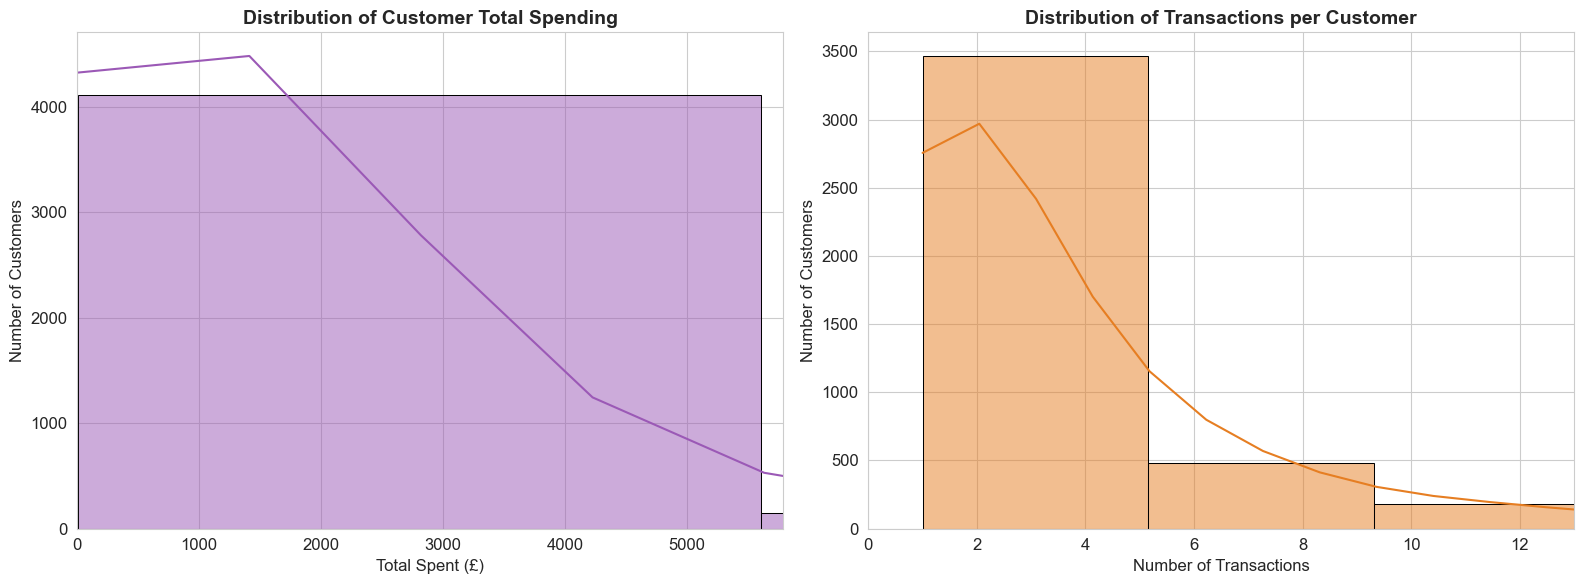


📌 Customer spending is heavily right-skewed: a small number of high-value customers
   generate disproportionate revenue (Pareto principle / 80-20 rule).
   This makes the data ideal for customer segmentation via K-Means clustering.


In [18]:
# ============================================================
# 4.8 Customer Purchase Behavior Analysis
# ============================================================
# Aggregate data at the customer level to understand spending patterns.
# This preview of RFM (Recency, Frequency, Monetary) analysis sets
# the foundation for K-Means clustering in Deliverable 3.

customer_stats = df_clean.groupby('CustomerID').agg(
    TotalSpent=('TotalPrice', 'sum'),
    NumTransactions=('InvoiceNo', 'nunique'),
    NumItemsPurchased=('Quantity', 'sum'),
    AvgOrderValue=('TotalPrice', 'mean')
).reset_index()

print(f"Total unique customers: {len(customer_stats):,}\n")
print("Customer Spending Statistics:")
print("=" * 60)
print(customer_stats[['TotalSpent', 'NumTransactions', 'NumItemsPurchased', 'AvgOrderValue']].describe().round(2))

# Distribution of Customer Total Spending
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Total spending distribution (log scale)
sns.histplot(customer_stats['TotalSpent'], bins=50, kde=True,
             color='#9b59b6', ax=axes[0], edgecolor='black')
axes[0].set_title('Distribution of Customer Total Spending', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Spent (£)')
axes[0].set_ylabel('Number of Customers')
axes[0].set_xlim(0, customer_stats['TotalSpent'].quantile(0.95))

# Number of transactions per customer
sns.histplot(customer_stats['NumTransactions'], bins=50, kde=True,
             color='#e67e22', ax=axes[1], edgecolor='black')
axes[1].set_title('Distribution of Transactions per Customer', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Transactions')
axes[1].set_ylabel('Number of Customers')
axes[1].set_xlim(0, customer_stats['NumTransactions'].quantile(0.95))

plt.tight_layout()
plt.show()

print("\n📌 Customer spending is heavily right-skewed: a small number of high-value customers")
print("   generate disproportionate revenue (Pareto principle / 80-20 rule).")
print("   This makes the data ideal for customer segmentation via K-Means clustering.")

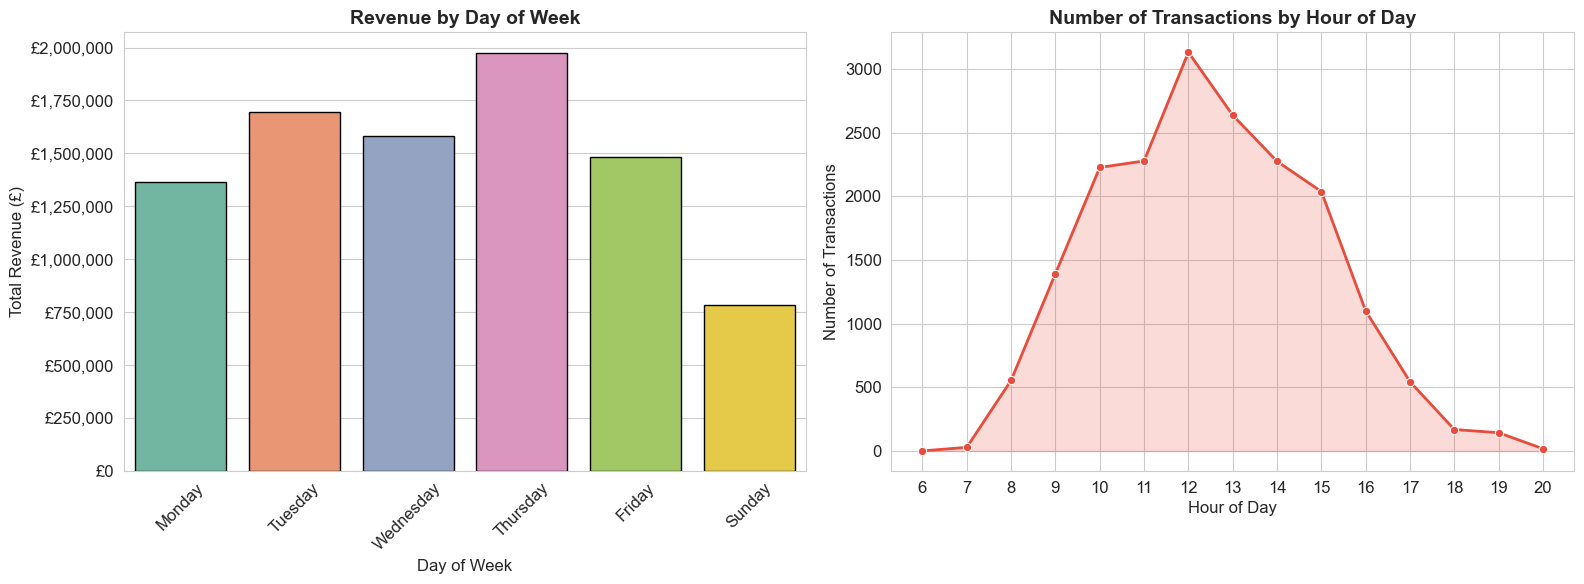

📌 Sales peak on Thursday and are absent on Saturday (the retailer likely does not
   operate on Saturdays). Transaction volume peaks between 10 AM and 3 PM.
   These temporal patterns can be encoded as features for classification models.


In [19]:
# ============================================================
# 4.9 Day-of-Week and Hour-of-Day Sales Patterns
# ============================================================
# Analyze purchasing patterns by time of day and day of week.
# These temporal features can be engineered for predictive modeling.

df_clean['DayOfWeek'] = df_clean['InvoiceDate'].dt.day_name()
df_clean['Hour'] = df_clean['InvoiceDate'].dt.hour

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Revenue by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday']
day_revenue = df_clean.groupby('DayOfWeek')['TotalPrice'].sum().reindex(day_order)
sns.barplot(x=day_revenue.index, y=day_revenue.values, palette='Set2',
            ax=axes[0], edgecolor='black')
axes[0].set_title('Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Day of Week')
axes[0].set_ylabel('Total Revenue (£)')
axes[0].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.0f}'))
axes[0].tick_params(axis='x', rotation=45)

# Transactions by Hour
hour_transactions = df_clean.groupby('Hour')['InvoiceNo'].nunique()
sns.lineplot(x=hour_transactions.index, y=hour_transactions.values,
             marker='o', color='#e74c3c', linewidth=2, ax=axes[1])
axes[1].fill_between(hour_transactions.index, hour_transactions.values, alpha=0.2, color='#e74c3c')
axes[1].set_title('Number of Transactions by Hour of Day', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_xticks(range(6, 21))

plt.tight_layout()
plt.show()

print("📌 Sales peak on Thursday and are absent on Saturday (the retailer likely does not")
print("   operate on Saturdays). Transaction volume peaks between 10 AM and 3 PM.")
print("   These temporal patterns can be encoded as features for classification models.")

---
## 5. Insights and Interpretations — How EDA Guides Future Modeling

### 5.1 Key Insights from Exploratory Data Analysis

| # | Insight | Evidence | Implication for Modeling |
|---|---------|----------|--------------------------|
| 1 | **Heavy right-skew in Quantity, UnitPrice, and TotalPrice** | Skewness values > 10; distributions concentrated near zero with long right tails | Apply **log-transformation** before regression to stabilize variance. Use **Ridge Regression** (L2 regularization) to handle potential multicollinearity. |
| 2 | **Significant outliers in all numerical features** | Box plots show thousands of data points beyond 1.5×IQR boundaries | Consider **capping at 99th percentile** or using robust scaling. Outlier-sensitive models (e.g., linear regression) will need preprocessing. |
| 3 | **Strong seasonal revenue patterns** | Revenue peaks in Nov 2011 (holiday season); steady growth from Q2 to Q4 | Engineer **month/quarter features** for regression. Time-based splits for train/test to prevent data leakage. |
| 4 | **United Kingdom dominates revenue (~82%)** | Geographic analysis shows UK accounts for the vast majority of transactions | Consider **stratified sampling** by country. Use Country as a categorical feature via one-hot encoding. |
| 5 | **Customer spending follows Pareto distribution** | Small fraction of customers generate most revenue; long tail of low-spenders | Ideal for **K-Means clustering** with RFM (Recency, Frequency, Monetary) features to segment customers into tiers. |
| 6 | **Two distinct purchasing behaviors** | Scatter plot shows high-quantity/low-price vs. low-quantity/high-price clusters | Useful for **classification** (e.g., "Bulk Buyer" vs. "Premium Buyer") and **Decision Tree** modeling. |
| 7 | **Transactional structure supports Market Basket Analysis** | Each invoice contains multiple products per transaction | Directly applicable to **Apriori algorithm** for discovering association rules (e.g., products frequently bought together). |
| 8 | **Clear day-of-week and hour-of-day patterns** | No Saturday sales; peak hours 10 AM–3 PM; Thursday highest revenue day | Temporal features (day, hour) can improve classification and regression accuracy. |

### 5.2 Connection to Future Deliverables

- **Deliverable 2 (Regression):** Use `Quantity`, `UnitPrice`, time-based features, and Country to predict `TotalPrice`. Apply log-transformation and Ridge Regression to address skewness and multicollinearity.
- **Deliverable 3 (Classification & Clustering):** Build RFM features from customer-level aggregations for K-Means clustering. Create customer labels (High/Low spender) for Decision Tree classification.
- **Deliverable 4 (Association Rule Mining):** Leverage the invoice-product structure for Apriori-based Market Basket Analysis to discover co-purchase patterns.

In [20]:
# ============================================================
# 5.3 Final Cleaned Dataset Summary
# ============================================================
# Print a comprehensive summary of the cleaned dataset.

print("=" * 70)
print("  FINAL CLEANED DATASET SUMMARY")
print("=" * 70)
print(f"  Rows:               {len(df_clean):,}")
print(f"  Columns:            {df_clean.shape[1]}")
print(f"  Unique Invoices:    {df_clean['InvoiceNo'].nunique():,}")
print(f"  Unique Products:    {df_clean['StockCode'].nunique():,}")
print(f"  Unique Customers:   {df_clean['CustomerID'].nunique():,}")
print(f"  Countries:          {df_clean['Country'].nunique()}")
print(f"  Date Range:         {df_clean['InvoiceDate'].min()} to {df_clean['InvoiceDate'].max()}")
print(f"  Total Revenue:      £{df_clean['TotalPrice'].sum():,.2f}")
print(f"  Avg Order Value:    £{df_clean['TotalPrice'].mean():,.2f}")
print(f"  Missing Values:     {df_clean.isnull().sum().sum()}")
print("=" * 70)

# Data types summary
print("\nColumn Data Types:")
print(df_clean.dtypes)
print("\n✅ The dataset is fully cleaned and ready for modeling in Deliverable 2.")

  FINAL CLEANED DATASET SUMMARY
  Rows:               392,692
  Columns:            12
  Unique Invoices:    18,532
  Unique Products:    3,665
  Unique Customers:   4,338
  Countries:          37
  Date Range:         2010-12-01 08:26:00 to 2011-12-09 12:50:00
  Total Revenue:      £8,887,208.89
  Avg Order Value:    £22.63
  Missing Values:     0

Column Data Types:
InvoiceNo                 str
StockCode                 str
Description               str
Quantity                int64
InvoiceDate    datetime64[us]
UnitPrice             float64
CustomerID              int64
Country                   str
TotalPrice            float64
YearMonth           period[M]
DayOfWeek                 str
Hour                    int32
dtype: object

✅ The dataset is fully cleaned and ready for modeling in Deliverable 2.
